In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)  

print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number"
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images is not equal 32 32 3"

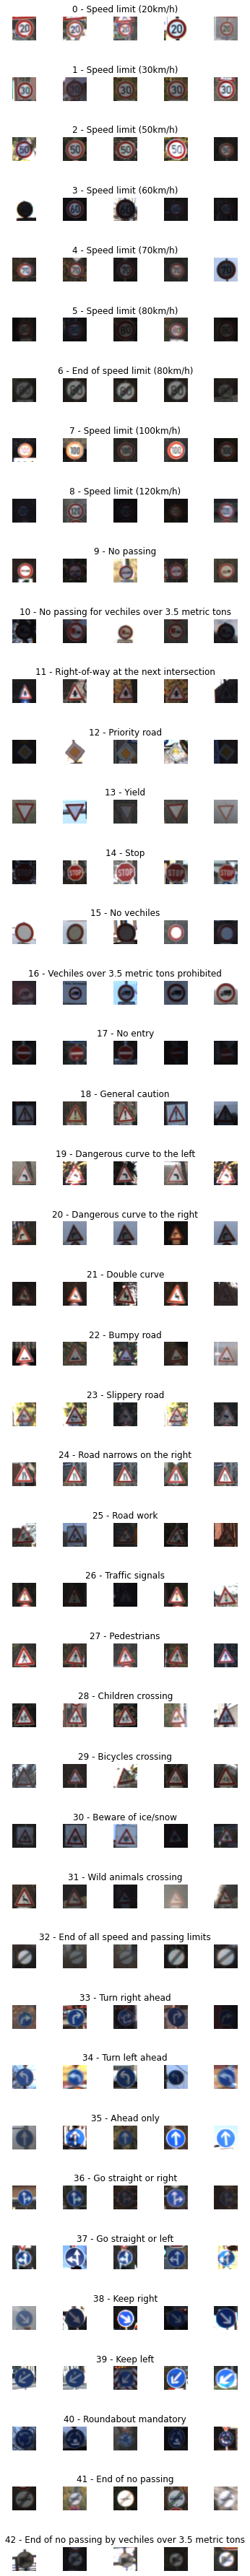

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
#print(data)
num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


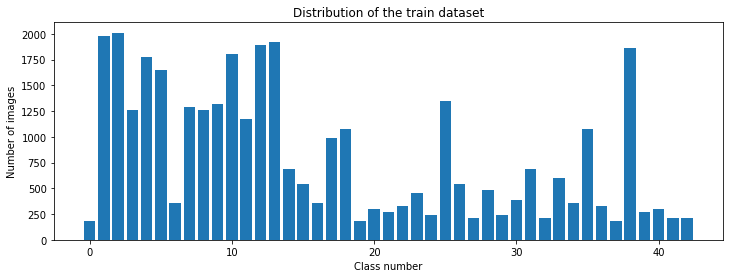

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


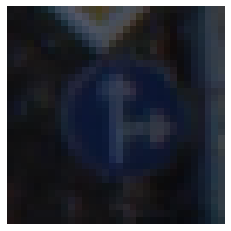

In [ ]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


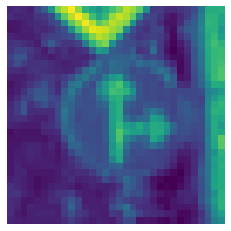

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

imggray = grayscale(X_train[1000])
plt.imshow(imggray)
plt.axis("off")
print(imggray.shape)


(32, 32)


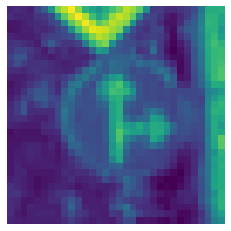

In [ ]:
def equalize(img):
  cv2.equalizeHist(img) 
  return img

img_equal = equalize(imggray)
plt.imshow(img_equal)
plt.axis('off')
print(img_equal.shape)

In [ ]:
def preprocess(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img


In [ ]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

(34799, 32, 32)


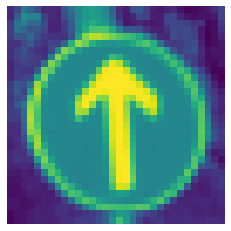

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))

  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model



In [ ]:
model = modified_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

In [ ]:
history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_val, y_val), batch_size =400, verbose =1 , shuffle =1)

Epoch 1/40
87/87 [==============================] - 4s 38ms/step - loss: 2.7618 - accuracy: 0.2764 - val_loss: 1.0162 - val_accuracy: 0.7417
Epoch 2/40
87/87 [==============================] - 3s 29ms/step - loss: 0.7985 - accuracy: 0.7639 - val_loss: 0.3528 - val_accuracy: 0.8959
Epoch 3/40
87/87 [==============================] - 3s 29ms/step - loss: 0.4155 - accuracy: 0.8739 - val_loss: 0.2167 - val_accuracy: 0.9363
Epoch 4/40
87/87 [==============================] - 3s 29ms/step - loss: 0.2890 - accuracy: 0.9124 - val_loss: 0.1754 - val_accuracy: 0.9492
Epoch 5/40
87/87 [==============================] - 3s 29ms/step - loss: 0.2233 - accuracy: 0.9331 - val_loss: 0.1444 - val_accuracy: 0.9576
Epoch 6/40
87/87 [==============================] - 3s 29ms/step - loss: 0.1914 - accuracy: 0.9425 - val_loss: 0.1180 - val_accuracy: 0.9644
Epoch 7/40
87/87 [==============================] - 3s 29ms/step - loss: 0.1627 - accuracy: 0.9497 - val_loss: 0.1475 - val_accuracy: 0.9580
Epoch 8/40
87

Text(0.5, 0, 'epoch')

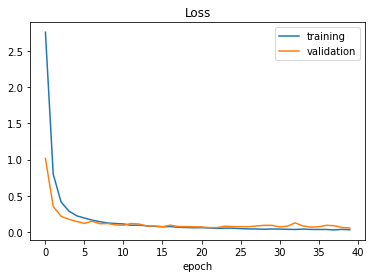

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

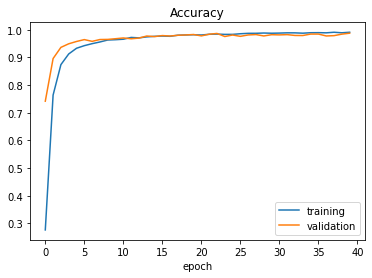

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.12575113773345947
Test accuracy: 0.9673000574111938


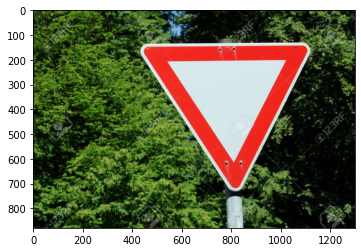

In [ ]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


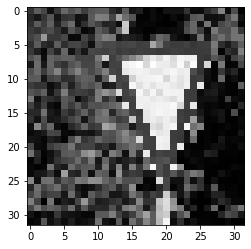

In [ ]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
img = img.reshape(1, 32, 32, 1)

In [ ]:
y_predict = np.argmax(model.predict(img), axis=-1)
print(f"predicted sign: {y_predict}")

1/1 [==============================] - 0s 122ms/step
predicted sign: [13]


In [ ]:
model.save('traffic_signs_model.h5')
from google.colab import files
files.download('traffic_signs_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>